In [8]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [10]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Difdoug\Difdoug_NE_1.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,0.113880,0.042485,1.97890,1.83630,2.88660,2.46960,0.21541,3.09000,0.78343,0.51035,0.03043,0.100660
1,0.029389,0.206580,0.48861,1.43430,3.12990,1.27780,1.42850,0.14333,1.19480,2.13180,0.98473,3.844500
2,-1.115400,0.217560,1.61050,1.33710,3.76820,1.21000,3.99630,2.21730,3.90290,1.51440,2.43890,0.633580
3,-0.539160,-0.061874,0.36486,0.33278,0.19027,0.56716,1.66010,2.35270,0.66126,3.13510,3.93810,3.734600
4,-0.268400,-1.006000,2.88220,1.56160,3.20140,3.37740,1.52260,0.98475,3.10940,3.65640,3.91720,0.947060
...,...,...,...,...,...,...,...,...,...,...,...,...
395,-1.867100,-4.729200,3.72580,3.70480,0.88269,0.35406,1.62780,3.29400,1.08500,0.15740,0.46504,2.851400
396,0.264630,-6.107600,3.90540,1.33770,1.41870,1.68610,1.09510,3.79360,0.12790,0.54249,3.36580,3.755600
397,-3.479100,-1.993300,1.32480,1.77210,2.55090,1.47010,0.92540,1.84110,3.47730,0.95496,1.52630,2.123800
398,7.293000,-0.411470,2.49480,0.39655,2.99900,3.41010,2.95160,0.27800,0.99059,3.43740,1.81620,0.087212


In [11]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	1
float64		column 2	1
float64		column 3	2
float64		column 4	2
float64		column 5	4
float64		column 6	6
float64		column 7	3
float64		column 8	4
float64		column 9	3
float64		column 10	1
float64		column 11	2
float64		column 12	7


In [12]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
count,399.000000,399.000000,398.000000,398.000000,396.000000,394.000000,397.000000,396.000000,397.000000,399.000000,398.000000,393.000000
mean,-0.100126,0.071813,2.031603,1.905427,1.943339,1.984104,2.025825,1.985335,1.966183,2.021954,1.956238,1.955174
std,2.567667,2.764239,1.130342,1.146106,1.165556,1.140841,1.157652,1.138246,1.144231,1.158011,1.152452,1.189112
min,-7.771000,-6.828400,0.005583,0.005376,0.000530,0.018503,0.003618,0.007321,0.007019,0.055837,0.006786,0.001972
25%,-0.698550,-0.820860,1.120125,0.945820,0.879365,1.045575,0.983030,1.034350,1.010000,1.031300,0.910822,0.907400
50%,-0.063939,0.021200,2.086550,1.792600,1.940900,2.026750,2.095800,1.966950,2.069100,2.077700,1.902000,1.926100
75%,0.766195,0.897005,2.980825,2.822825,2.991100,2.964175,2.972100,3.027900,2.931600,3.040500,2.966425,2.985000
max,8.409300,6.777100,3.976400,3.993400,3.979000,3.992300,3.996300,3.995000,3.985500,3.984300,3.967600,3.996000


<AxesSubplot:>

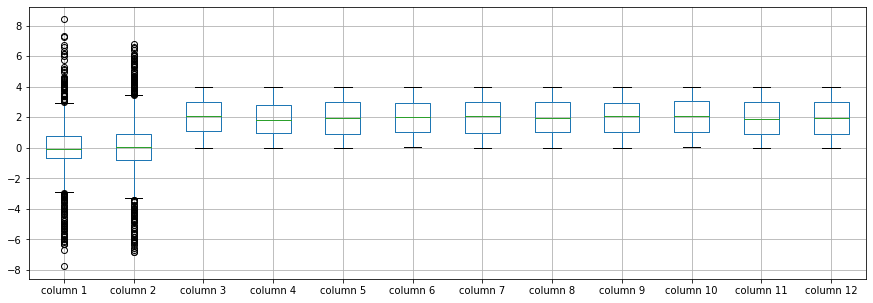

In [13]:
df.boxplot(return_type='axes', figsize=(15,5))

In [14]:
df.mean()

column 1    -0.100126
column 2     0.071813
column 3     2.031603
column 4     1.905427
column 5     1.943339
column 6     1.984104
column 7     2.025825
column 8     1.985335
column 9     1.966183
column 10    2.021954
column 11    1.956238
column 12    1.955174
dtype: float64

In [15]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
column 1,1.000000,0.011027,-0.058975,-0.079481,0.012739,-0.009847,-0.024836,0.030352,-0.015388,0.049731,0.074747,-0.014606
column 2,0.011027,1.000000,-0.045174,0.031482,-0.086167,-0.097651,0.019966,-0.043990,-0.027141,0.009865,-0.026878,0.052184
column 3,-0.058975,-0.045174,1.000000,0.012600,-0.020786,-0.048948,-0.082667,0.062285,0.105057,-0.027604,-0.084627,-0.026801
column 4,-0.079481,0.031482,0.012600,1.000000,-0.008085,0.102768,0.005642,0.088260,-0.006535,0.080326,-0.034357,-0.044531
column 5,0.012739,-0.086167,-0.020786,-0.008085,1.000000,0.092682,0.038523,0.007623,0.000166,0.023039,0.007324,-0.028115
column 6,-0.009847,-0.097651,-0.048948,0.102768,0.092682,1.000000,0.006978,0.079576,0.006468,0.010986,0.026022,-0.036007
column 7,-0.024836,0.019966,-0.082667,0.005642,0.038523,0.006978,1.000000,-0.028825,0.072189,0.031636,-0.010712,-0.059651
column 8,0.030352,-0.043990,0.062285,0.088260,0.007623,0.079576,-0.028825,1.000000,0.052041,-0.138086,-0.044783,-0.023077
column 9,-0.015388,-0.027141,0.105057,-0.006535,0.000166,0.006468,0.072189,0.052041,1.000000,0.005205,0.029850,0.054086
column 10,0.049731,0.009865,-0.027604,0.080326,0.023039,0.010986,0.031636,-0.138086,0.005205,1.000000,-0.002623,0.027695


In [16]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [17]:
imputer = md.Midas(layer_structure = [12,12+18,12+18+18,12+18+18+18,12+18+18+18+18,12+18+18+18+18+18,12+18+18+18+18+18+18,12+18+18+18+18+18+18+18,12+18+18+18+18+18+18,12+18+18+18+18+18,12+18+18+18+18,12+18+18+18,12+18+18,12+18,12], vae_layer = False, seed = 18)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [12]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 27.727204513549804
Epoch: 1 , loss: 27.631705932617187
Epoch: 2 , loss: 27.571087646484376
Epoch: 3 , loss: 27.48242477416992
Epoch: 4 , loss: 27.447701568603517
Epoch: 5 , loss: 27.263034057617187
Epoch: 6 , loss: 26.842589874267578
Epoch: 7 , loss: 25.598682861328125
Epoch: 8 , loss: 23.624135360717773
Epoch: 9 , loss: 22.79064971923828
Epoch: 10 , loss: 22.381517944335936
Epoch: 11 , loss: 22.05711715698242
Epoch: 12 , loss: 21.85591781616211
Epoch: 13 , loss: 21.673498764038087
Epoch: 14 , loss: 21.663906860351563
Epoch: 15 , loss: 21.52574966430664
Epoch: 16 , loss: 21.256041793823243
Epoch: 17 , loss: 21.04653274536133
Epoch: 18 , loss: 20.738497924804687
Epoch: 19 , loss: 20.960629806518554
Epoch: 20 , loss: 20.779151763916015
Epoch: 21 , loss: 20.77585319519043
Epoch: 22 , loss: 20.394501342773438
Epoch: 23 , loss: 20.5802384185791
Epoch: 24 , loss: 20.85092842102051
Epoch: 25 , loss: 20.359328

In [18]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(400, 12)

In [19]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    -0.70595
column 2     0.12893
column 3     1.05810
column 4     2.13620
column 5     2.14860
column 6     2.24580
column 7     3.72770
column 8     2.22720
column 9     1.94350
column 10    1.98700
column 11    2.47070
column 12    0.36826
Name: 21, dtype: float64

In [20]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Difdoug.xlsx', header=None,names=column_names)

In [21]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0
396,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0
397,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0
398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0


Calculating NRMSE Value

In [22]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [23]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [24]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(11.149209816915883, 163.27447192538312)

In [25]:
NRMS=numerator/denominator
NRMS


0.06828507656733443

In [26]:
new_df.iloc[66,:]

column 1     0.822720
column 2     0.267760
column 3     0.403430
column 4     0.385794
column 5     3.956600
column 6     2.583000
column 7     2.830600
column 8     3.074200
column 9     1.538100
column 10    0.246200
column 11    0.853340
column 12    3.604400
Name: 66, dtype: float64

In [27]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,0.113880,0.042485,1.97890,1.83630,2.88660,2.46960,0.21541,3.09000,0.78343,0.51035,0.03043,0.100660
1,0.029389,0.206580,0.48861,1.43430,3.12990,1.27780,1.42850,0.14333,1.19480,2.13180,0.98473,3.844500
2,-1.115400,0.217560,1.61050,1.33710,3.76820,1.21000,3.99630,2.21730,3.90290,1.51440,2.43890,0.633580
3,-0.539160,-0.061874,0.36486,0.33278,0.19027,0.56716,1.66010,2.35270,0.66126,3.13510,3.93810,3.734600
4,-0.268400,-1.006000,2.88220,1.56160,3.20140,3.37740,1.52260,0.98475,3.10940,3.65640,3.91720,0.947060
...,...,...,...,...,...,...,...,...,...,...,...,...
395,-1.867100,-4.729200,3.72580,3.70480,0.88269,0.35406,1.62780,3.29400,1.08500,0.15740,0.46504,2.851400
396,0.264630,-6.107600,3.90540,1.33770,1.41870,1.68610,1.09510,3.79360,0.12790,0.54249,3.36580,3.755600
397,-3.479100,-1.993300,1.32480,1.77210,2.55090,1.47010,0.92540,1.84110,3.47730,0.95496,1.52630,2.123800
398,7.293000,-0.411470,2.49480,0.39655,2.99900,3.41010,2.95160,0.27800,0.99059,3.43740,1.81620,0.087212


In [28]:
imputations[-1].to_excel("Difdoug_NE_1(imp).xlsx", index=False, header=False)